### Esercizio 1
In un certo ufficio di una ditta arrivano gli ordini da parte dei clienti con una media di 10 
ordini al giorno. Di tutti gli ordini che arrivano una frazione del 2% non può essere 
soddisfatta in quanto si riferisce ad articoli fuori produzione.  
1) Quale distribuzione può essere appropriata per la variabile aleatoria che conta il 
numero di ordini arrivati in un giorno a caso? Sotto quali ipotesi? Calcolare la 
probabilità che in un giorno arrivino non più di 3 ordini.


In [12]:
import numpy as np
from scipy.stats import poisson

lam = 10 #numero medio di ordini arrivati in un giorno
p = 0.02 #probabilità che un ordine non possa essere soddisfatto
n = 100
k1 = 3
k2 = 2

#L'arrivo di un ordine è un evento che può essere schematizzato secondo un modello successo-insuccesso.
#Ipotizzando che il numero di persone che possono fare un ordine alla ditta sia molto maggiore di 10 segue che
#la probabilità che una persona faccia effettivamente un ordine alla ditta sia molto bassa. Supponendo valida
#questa ipotesi una distribuzione appropriata è quella di Poisson.

#Punto 1: P(X<=3)
p1 = poisson.cdf(k1, lam)
print("Probabilità che in un giorno arrivino non più di 3 ordini:",p1)

Probabilità che in un giorno arrivino non più di 3 ordini: 0.010336050675925726


2) Quale distribuzione può essere appropriata per la variabile aleatoria che conta il 
numero di ordini che non possono essere soddisfatti su 100 ordini arrivati? Sotto quali 
ipotesi? Calcolare la probabilità che su 100 ordini arrivati almeno 2 non possano 
essere soddisfatti.

In [13]:
from scipy.stats import binom
p2_poisson = 1-poisson.cdf(k2-1,n*p)
display(p2_poisson)

# Test con binomiale 

p2_binomiale = 1 - binom.cdf(k2-1, n, p)
display(p2_binomiale)

0.593994150290162

0.5967282892179967

### Esercizio 2
I seguenti dati di deformazione laterale (εy) e longitudinale (εx) sono stati ottenuti 
sottoponendo a sforzo delle barre fabbricate con una lega sperimentale.  
![image.png](attachment:image.png)
1) Calcolare il coefficiente di correlazione delle variabili εx, εy.
2) È ragionevole supporre che sussista una relazione lineare tra le variabili?
3) Determinare la retta di regressione e calcolare la deformazione laterale corrispondente ai valori εx=0.35 e εx=0.8.

In [16]:
import numpy as np

x = np.array([0.3, 0.4, 0.2, 0.5, 0.6])
y = np.array([0.11, 0.14, 0.06, 0.16, 0.22])

x_mean = np.mean(x)
y_mean = np.mean(y)
n = x.size

sigma_xy = np.sum((x - x_mean)*(y-y_mean))/n
sigma_x2 = np.sum((x-x_mean)**2)/n
sigma_y2 = np.sum((y-y_mean)**2)/n
R2 = (sigma_xy**2)/((sigma_x2)*(sigma_y2))
display(R2)

coefficiente_correlazione_lineare = np.sqrt(R2)
display(coefficiente_correlazione_lineare)

# Visto che R2 è prossimo ad 1 possiamo affermare che con alta probabilita è usato il modello di lineare 

0.9723011363636364

0.9860533131446982

In [20]:
#È ragionevole supporre che sussista una relazione lineare tra le variabili?

from scipy.stats import t

# Calcoliamo y_hat = b_0 + b_1*x
b_0 = y_mean - (sigma_xy/sigma_x2)*x_mean
display(b_0)
b_1 = sigma_xy/sigma_x2
display(b_1)

y_hat = b_0 + b_1 * x
r = y - y_hat 
s2 = np.sum(r**2)/(n-2)

alpha = 0.05 
phi = t.ppf(1-alpha, (n-2))
T1 = np.sqrt(n)*(b_1/np.sqrt(s2))*np.sqrt(sigma_x2)
display(phi, T1)

# Visto che T1 > di phi rigettiamo l'ipotesi e quindi esiste una relazione lineare

# In base ai parametri dati 
y_1 = b_0+b_1 * 0.35
y_2 = b_0+b_1 * 0.8
display(y_1, y_2) 

-0.010000000000000037

0.37000000000000005

0.11949999999999997

0.28600000000000003

2.3533634348018264

10.26195363016674

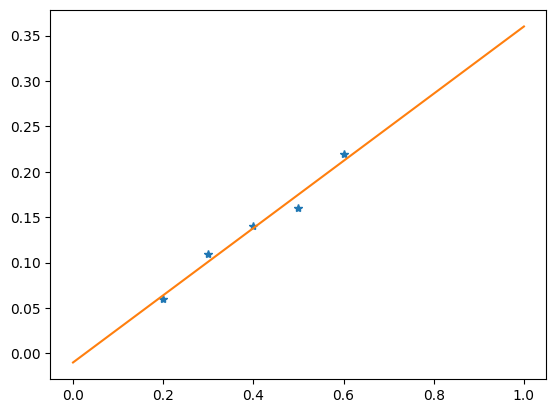

In [23]:
import matplotlib.pyplot as plt 

plt.plot(x,y,"*")
xx = np.linspace(0,1,1000)
yy = b_0 + b_1 *xx
plt.plot(xx,yy)
plt.show()
